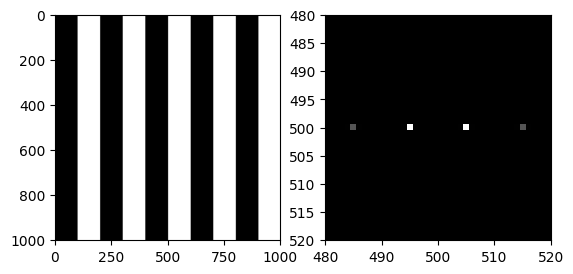

In [1]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
angle = 0
grating = np.where(np.sin(2 * np.pi * X / wavelength) > 0, 1, -1)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

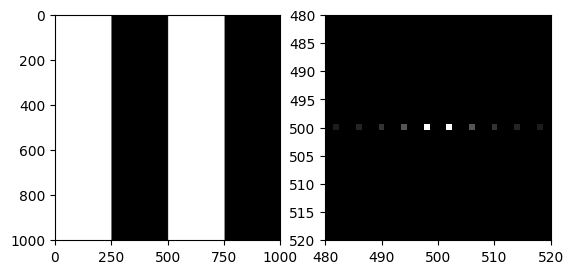

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 500
angle = 0

# Use a square function instead of sine
grating = np.where(np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength) > 0, 1, -1)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()


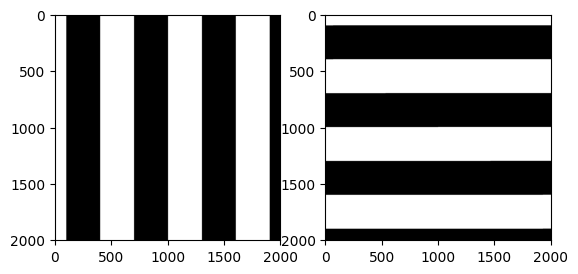

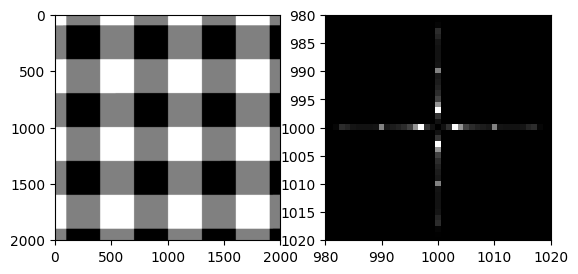

In [3]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1000, 1001, 1)

X, Y = np.meshgrid(x, x)

wavelength_1 = 600
angle_1 = 0
grating_1 = np.where(np.sin(2*np.pi*(X*np.cos(angle_1) + Y*np.sin(angle_1)) / wavelength_1) > 0, 1, -1)

wavelength_2 = 600
angle_2 = np.pi/2
grating_2 = np.where(np.sin(2*np.pi*(X*np.cos(angle_2) + Y*np.sin(angle_2)) / wavelength_2) > 0, 1, -1)


plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating_1)
plt.subplot(122)
plt.imshow(grating_2)
plt.show()

gratings = grating_1 + grating_2

# Calculate Fourier transform of the sum of the two gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.figure()
plt.subplot(121)
plt.imshow(gratings)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([980, 1020])
plt.ylim([1020, 980])  # Note, order is reversed for y
plt.show()

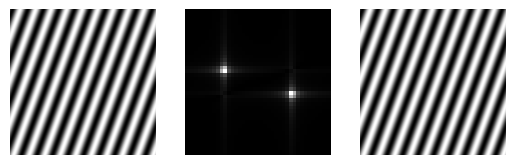

In [4]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 100
angle = np.pi/9
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.set_cmap("gray")

plt.subplot(131)
plt.imshow(grating)
plt.axis("off")

# Calculate the Fourier transform of the grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(132)
plt.imshow(abs(ft))
plt.axis("off")
plt.xlim([480, 520])
plt.ylim([520, 480])

# Calculate the inverse Fourier transform of 
# the Fourier transform
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part

plt.subplot(133)
plt.imshow(ift)
plt.axis("off")
plt.show()

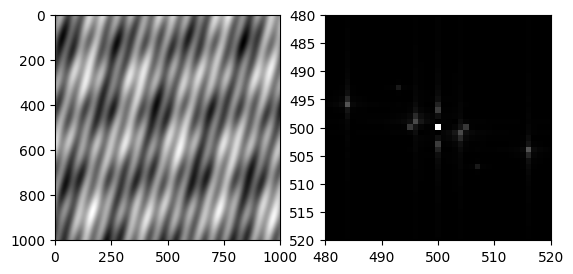

In [5]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12

gratings = np.zeros(X.shape)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / w_len
    )

# Add a constant term to represent the background of image
gratings += 1.25

# Calculate Fourier transform of the sum of the gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

(301, 301)


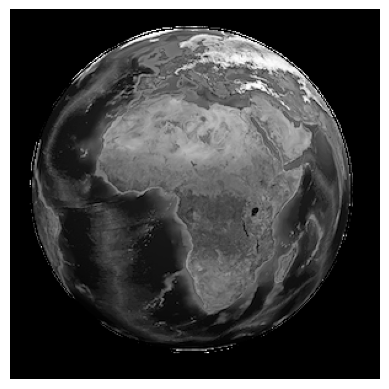

In [6]:
# fourier_synthesis.py

import matplotlib.pyplot as plt

image_filename = "Earth.png"

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale
print(image.shape)

plt.set_cmap("gray")

plt.imshow(image)
plt.axis("off")
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift, ifft2

def image_fourier_transform(image_path):
    # Read the image
    img = plt.imread(image_path)

    # Convert to grayscale if the image is in color
    if len(img.shape) == 3:
        img = np.mean(img, axis=-1)

    # Perform Fourier transform
    ft = fft2(img)
    ft_shifted = fftshift(ft)

    # Calculate magnitude spectrum
    magnitude_spectrum = np.abs(ft_shifted)

    return img, ft_shifted, magnitude_spectrum

def plot_results(img, ft_shifted, magnitude_spectrum):
    plt.figure(figsize=(10, 6))

    plt.subplot(231)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(232)
    plt.imshow(np.log(np.abs(ft_shifted) + 1), cmap='gray')
    plt.title('Fourier Transform')

    #plt.subplot(233)
    #plt.imshow(np.angle(ft_shifted), cmap='hsv')
    #plt.title('Phase Spectrum')

    #plt.subplot(234)
    #plt.plot(np.abs(ft_shifted[len(ft_shifted)//2, :]))
    #plt.title('Horizontal Profile')

    #plt.subplot(235)
    #plt.plot(np.abs(ft_shifted[:, len(ft_shifted)//2]))
    #plt.title('Vertical Profile')

    #plt.subplot(236)
    #plt.imshow(magnitude_spectrum, cmap='gray')
    #plt.title('Magnitude Spectrum')

    plt.tight_layout()
    plt.show()
    
def inverse_fourier_transform(ft_shifted):
    # Perform inverse Fourier transform
    img_recreated = ifft2(fftshift(ft_shifted)).real

    return img_recreated

def plot_recreated_image(img_recreated):
    plt.figure(figsize=(8, 4))

    plt.subplot(122)
    plt.imshow(img_recreated, cmap='gray')
    plt.title('Recreated Image')

    plt.tight_layout()
    plt.show()




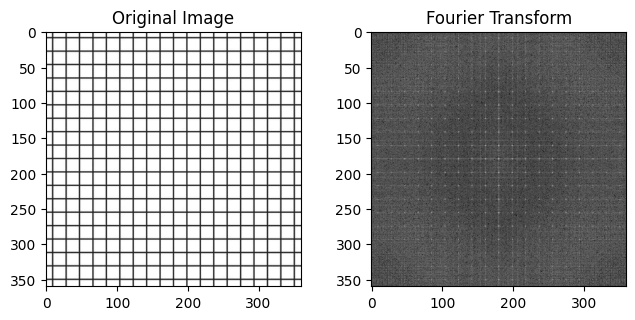

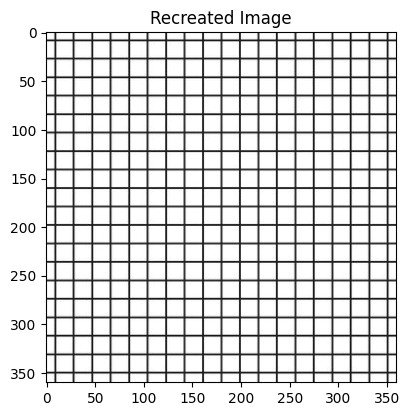

In [8]:
image = 'mesh.jpg'

img, ft_shifted1, magnitude_spectrum = image_fourier_transform(image)
plot_results(img, ft_shifted1, magnitude_spectrum)

img_rec = inverse_fourier_transform(ft_shifted1)
plot_recreated_image(img_rec)

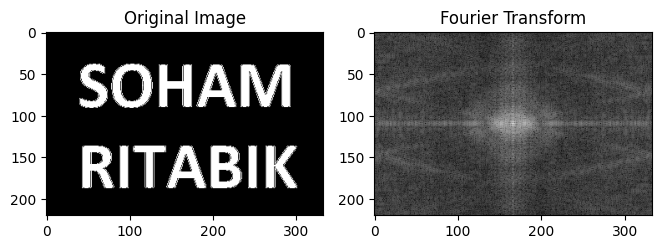

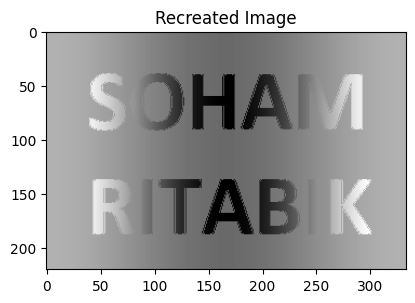

In [9]:
image1 = 'name.png'

img, ft_shifted1, magnitude_spectrum = image_fourier_transform(image1)
plot_results(img, ft_shifted1, magnitude_spectrum)

img_rec = inverse_fourier_transform(ft_shifted1)
plot_recreated_image(img_rec)


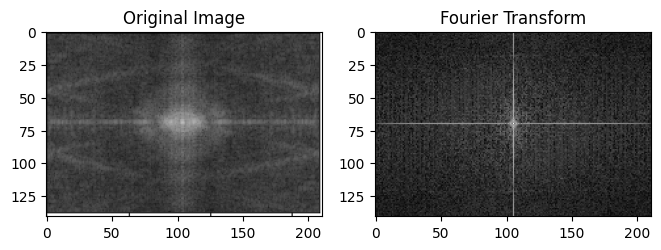

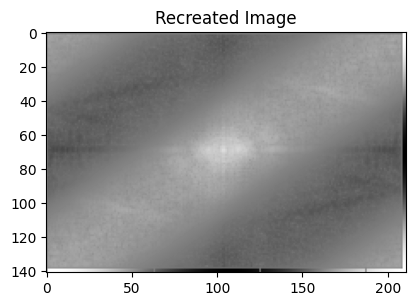

In [10]:
img, ft_shifted2, magnitude_spectrum = image_fourier_transform('output2.png')
img_rec1 = inverse_fourier_transform(ft_shifted2)

plot_results(img, ft_shifted2, magnitude_spectrum)
plot_recreated_image(img_rec1)

Using Diffractio

In [11]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
import diffractio as difc

In [12]:
x0 = np.linspace(-5000 * um, 5000 * um, 1024)
y0 = np.linspace(-5000 * um, 5000 * um, 1024)
wavelength = .63 * um

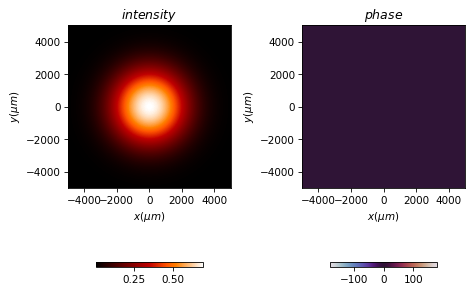

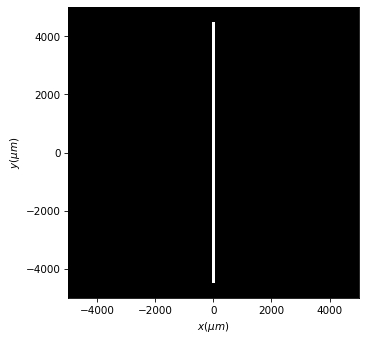

In [13]:
# plane wave
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beam(r0=(0, 0), w0=(3000 * um, 3000 * um), z0=0.0)
u0.draw(kind='field', logarithm=True)

# slit
t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.square(r0=(0, 0), size=(100 * um, 9000* um), angle=0)
t0.draw()

#plt.xlim(-10, 10)
#plt.ylim(-10, 10)

u1 = u0 * t0

(-2000.0, 2000.0)

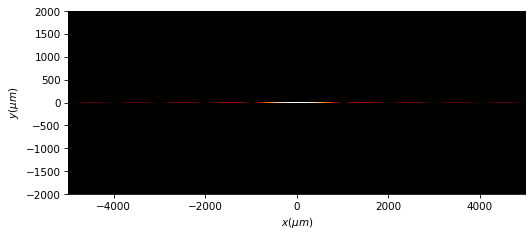

In [14]:
u2 = u1.fft(remove0=False, new_field=True)
u2.draw(logarithm=1e-5)
plt.ylim(-2000, 2000)

(-1000.0, 1000.0)

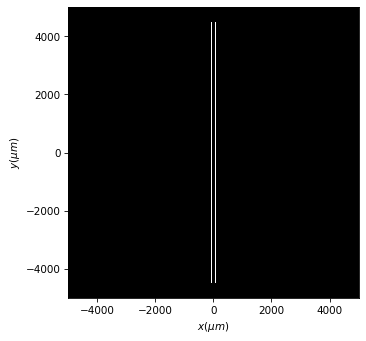

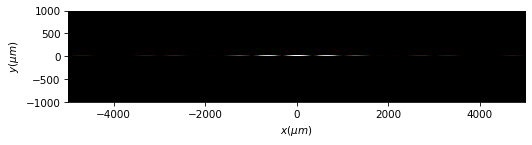

In [15]:
# double slit
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.square(r0=(-75, 0), size=(50 * um, 9000* um), angle=0)

t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t2.square(r0=(75, 0), size=(50 * um, 9000* um), angle=0)

t = t1 + t2
t.draw()

u5 = u0 * t
u6 = u5.fft(remove0=False, new_field=True)
u6.draw(logarithm=1e-6)
plt.ylim(-1000,1000)


(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b22aa6c100>)

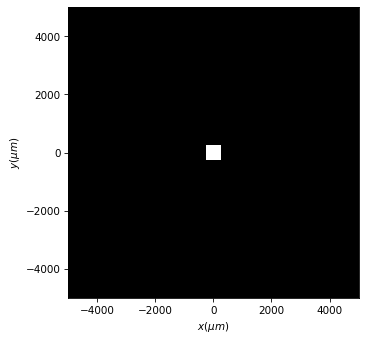

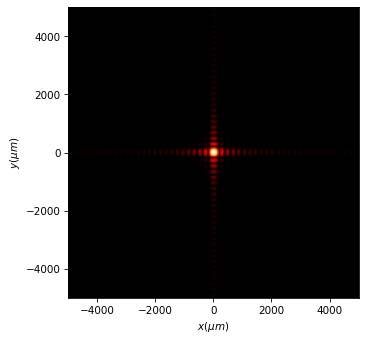

In [16]:

m1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
m1.square(r0=(0, 0), size=(500 * um, 500* um), angle=0)
m1.draw()

u3 = u0 * m1

u2 = u3.fft(remove0=False, new_field=True)
u2.draw(logarithm=1e-4)

(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b22b86f220>)

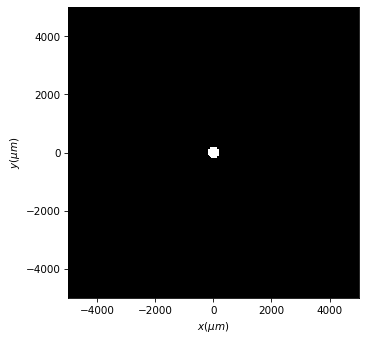

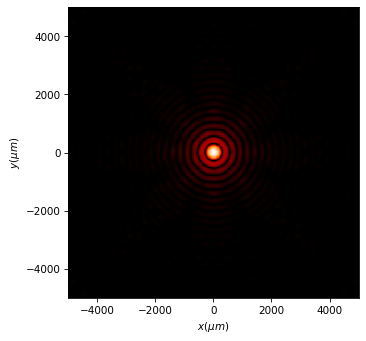

In [43]:
m2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
radius = 200 * um
m2.circle(
        r0=(0 * um, 0 * um),
        radius=(radius * um, radius * um),
        angle=15)
m2.draw()

u3 = u0 * m2

u2 = u3.fft(remove0=False, new_field=True)
u2.draw(logarithm=1e-3)

(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b22ae28670>)

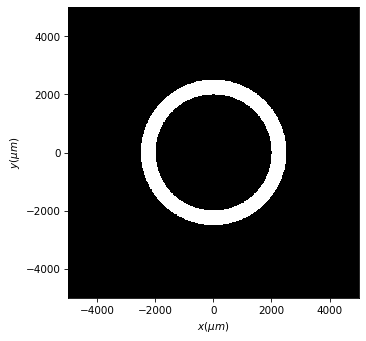

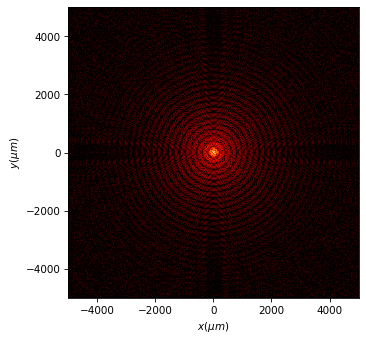

In [38]:
circ = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
rad1=2000*um
rad2 = 2500*um
angle = 90 * degrees
circ.ring(r0=(0,0), radius1=rad1, radius2=rad2, angle=angle)
circ.draw()

cir = circ * u0
cir = cir.fft(remove0=False, new_field=True)
cir.draw(logarithm=1e-2)


(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b22ae98fa0>)

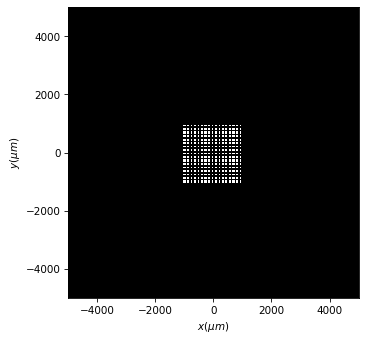

In [19]:
m0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    
for j in range(-1000, 1000, 120):
    for i in range(-1000,1000,120):
        m_ = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
        m_.square(r0=(i, j), size=(65 * um, 65* um), angle=0)
        m0 = m0 + m_
    
m0.draw()


(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b22aedfb50>)

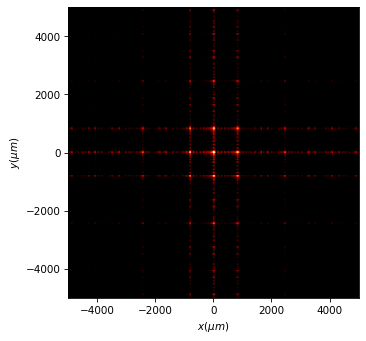

In [20]:
u4 = u0 * m0
u2 = u4.fft(remove0=False, new_field=True)
u2.draw(logarithm=1e-4)


(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b229f215b0>)

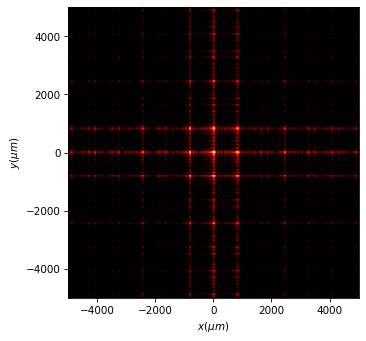

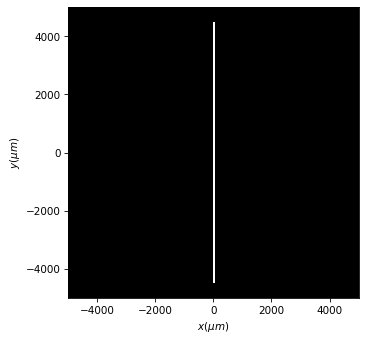

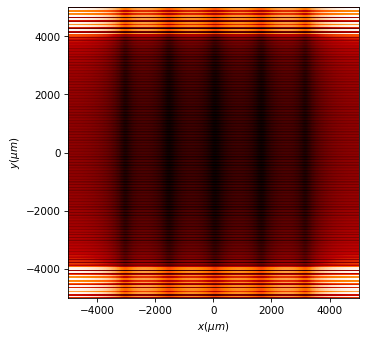

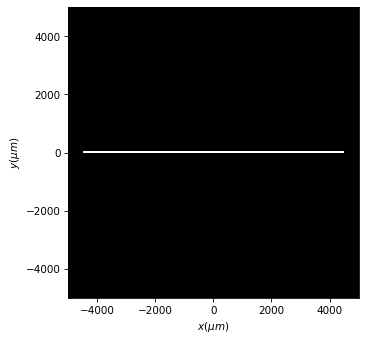

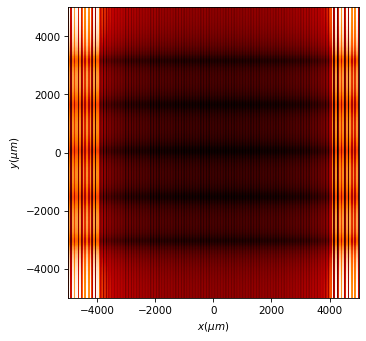

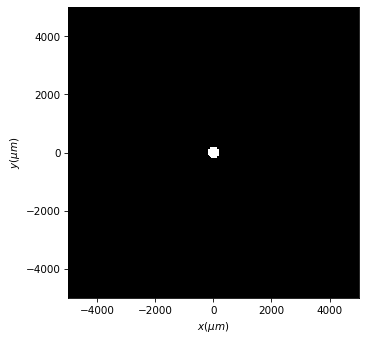

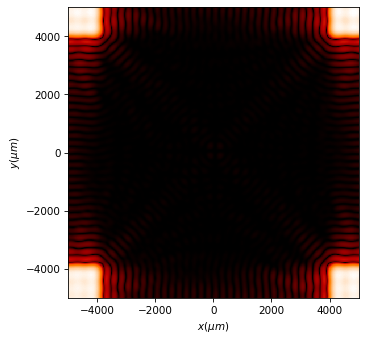

In [21]:
#spatial filtering
u2.draw(logarithm=1e-3)

# Verstical slit filter
vslit = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
vslit.square(r0=(0, 0), size=(65 * um, 9000* um), angle=0)
vslit.draw()

v10 = u2 *  vslit
v11 = v10.fft(remove0=False, new_field=True)
v11.draw(logarithm=1e-2)


# horizontal slit filter
hslit = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
hslit.square(r0=(0, 0), size=(9000 * um, 65* um), angle=0)
hslit.draw()

v10_ = u2 *  hslit
v11_ = v10_.fft(remove0=False, new_field=True)
v11_.draw(logarithm=1e-2)


lpassfilter = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
radius = 200 * um
lpassfilter.circle(
        r0=(0 * um, 0 * um),
        radius=(radius * um, radius * um),
        angle=15)
lpassfilter.draw()

vlp = u2 *  lpassfilter
vlp_ = vlp.fft(remove0=False, new_field=True)
vlp_.draw(logarithm=1e-6)

(-1000.0, 1000.0)

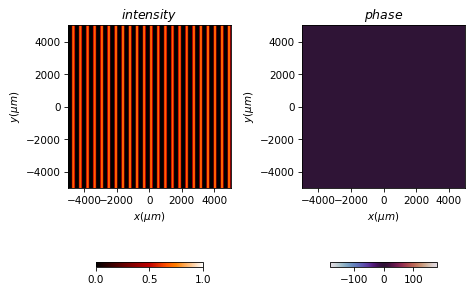

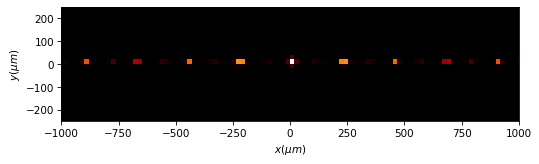

In [22]:
grating = Scalar_mask_XY(x0, y0, wavelength)
grating.ronchi_grating(x0=0 * um, period=10*um, fill_factor=0.4,  angle=0)

grating.draw(kind='field', logarithm=True)

v7 = u0 * grating

v8 = v7.fft(remove0=False, new_field=True)
v8.draw(logarithm=1e-6)
plt.ylim(-250,250)
plt.xlim(-1000,1000)

(-1000.0, 1000.0)

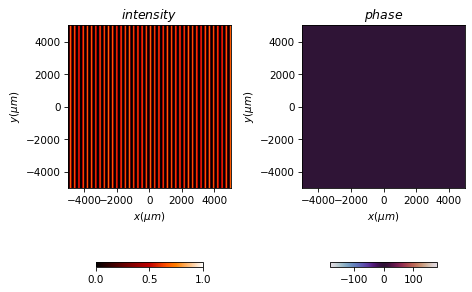

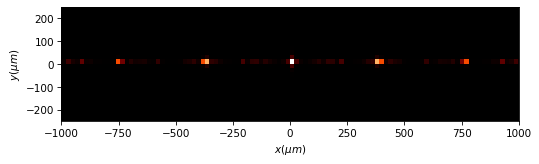

In [23]:
grating = Scalar_mask_XY(x0, y0, wavelength)
grating.ronchi_grating(x0=0 * um, period=3.3*um, fill_factor=0.4,  angle=0)

grating.draw(kind='field', logarithm=True)

v7 = u0 * grating

v8 = v7.fft(remove0=False, new_field=True)
v8.draw(logarithm=1e-6)
plt.ylim(-250,250)
plt.xlim(-1000,1000)

(-1000.0, 1000.0)

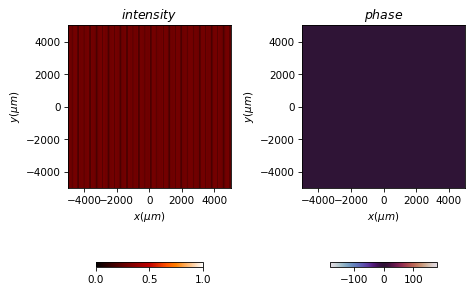

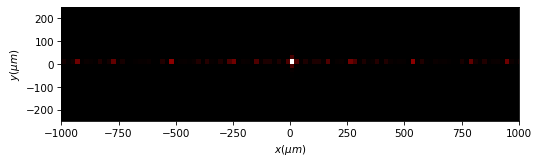

In [24]:
grating = Scalar_mask_XY(x0, y0, wavelength)
grating.ronchi_grating(x0=0 * um, period=1.67*um, fill_factor=0.4,  angle=0)

grating.draw(kind='field', logarithm=True)

v7 = u0 * grating

v8 = v7.fft(remove0=False, new_field=True)
v8.draw(logarithm=1e-6)
plt.ylim(-250,250)
plt.xlim(-1000,1000)

(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b229b1db50>)

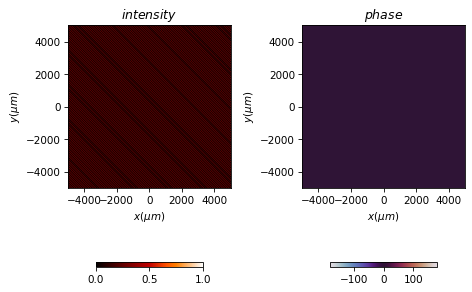

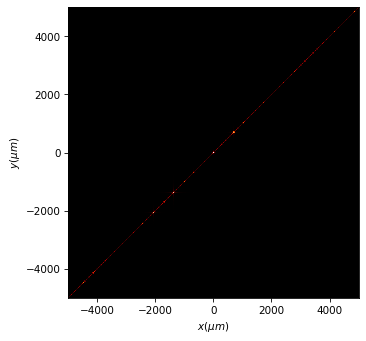

In [25]:
grating = Scalar_mask_XY(x0, y0, wavelength)
grating.ronchi_grating(x0=0 * um, period=100*um, fill_factor=0.2,  angle=45*degrees)

grating.draw(kind='field', logarithm=True)

v7 = u0 * grating

v8 = v7.fft(remove0=False, new_field=True)
v8.draw(logarithm=1e-4)


(-1000.0, 1000.0)

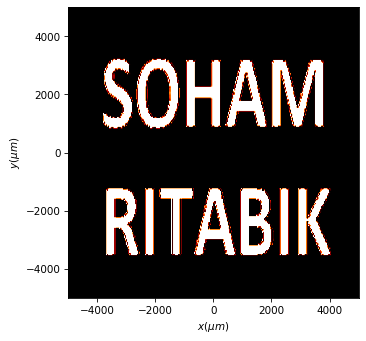

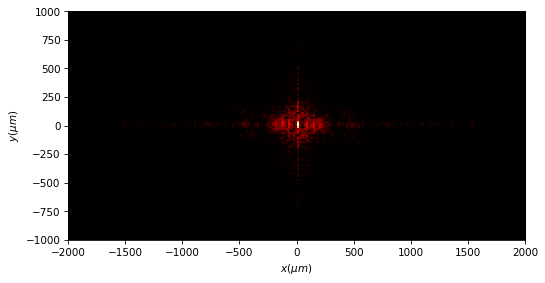

In [26]:
name = Scalar_mask_XY(x0, y0, wavelength)
name.image(filename='name.png', canal=0, normalize=True, lengthImage=False, invert=False, angle=0)
name.draw()

v1 = u0 * name
v2 = v1.fft(remove0=False, new_field=True)
v2.draw(logarithm=1e-6)
plt.xlim(-2000,2000)
plt.ylim(-1000,1000)


(226, 452)


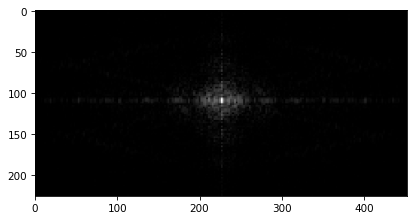

In [27]:
image = plt.imread("output.png")
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale
print(image.shape)
plt.imshow(image)

# letter filtering

(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b22af4e550>)

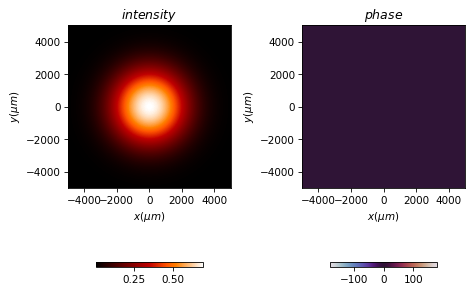

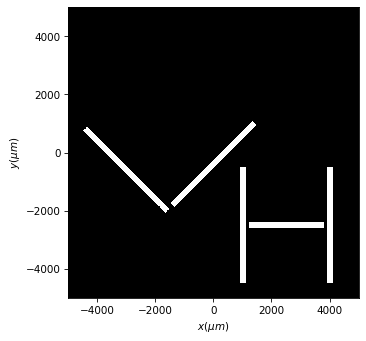

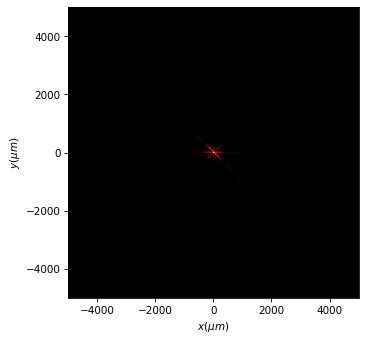

In [28]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beam(r0=(0, 0), w0=(3000 * um, 3000 * um), z0=0.0)
u0.draw(kind='field', logarithm=True)



V = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
V1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
V1.square(r0=(-3000, -600), size=(200 * um, 4000* um), angle=45 * degrees)
V = V + V1

V2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
V2.square(r0=(0, -400), size=(200 * um, 4000* um), angle=-45 * degrees)
V = V + V2

H1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
H1.square(r0=(1000, -2500), size=(200 * um, 4000* um), angle=0 * degrees)
V = V + H1

H2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
H2.square(r0=(4000, -2500), size=(200 * um, 4000* um), angle=0 * degrees)
V = V + H2


H3 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
H3.square(r0=(2500, -2500), size=(2580 * um, 200* um), angle=0 * degrees)
V = V + H3

V.draw()
vfinal = V * u0
finalfft = vfinal.fft(remove0=False, new_field=True)
finalfft.draw(logarithm=1e-6)


(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b22a3ca0a0>)

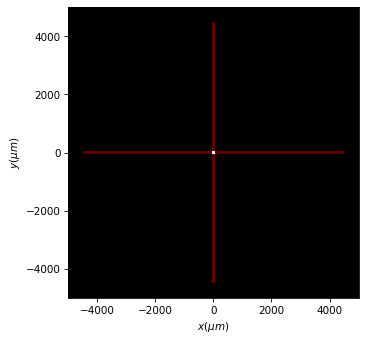

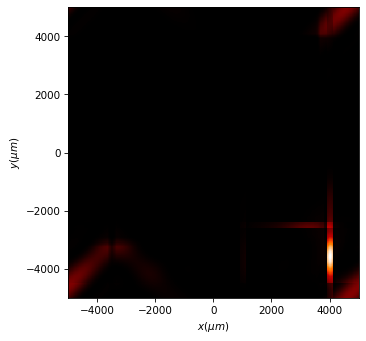

In [29]:
# filters
# filter 1
filter1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

filt1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
filt1.square(r0=(0, 0), size=(100 * um, 9000* um), angle=0)
filter1 = filter1 + filt1

filt2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
filt2.square(r0=(0, 0), size=(100 * um, 9000* um), angle=90*degrees)
filter1 = filter1 + filt2

filter1.draw()
f = finalfft * filter1
f_ = f.fft(remove0=False, new_field=True)
f_.draw()

(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b22aac79a0>)

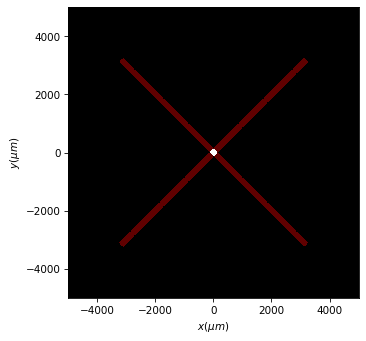

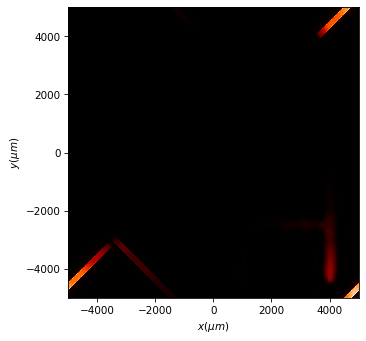

In [30]:
filter2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

filt1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
filt1.square(r0=(0, 0), size=(200 * um, 9000* um), angle=45*degrees)
filter2 = filter2 + filt1

filt2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
filt2.square(r0=(0, 0), size=(200 * um, 9000* um), angle=-45*degrees)
filter2 = filter2 + filt2

filter2.draw()
f = finalfft * filter2
f_ = f.fft(remove0=False, new_field=True)
f_.draw()

# Fourier addition

(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b22a264610>)

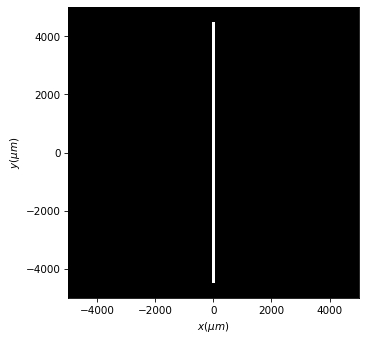

In [31]:
m_ = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
m_.square(r0=(0, 0), size=(100 * um, 9000* um), angle=0)
m_.draw()

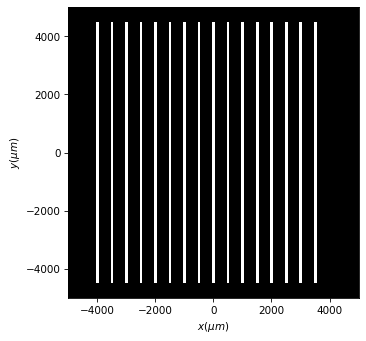

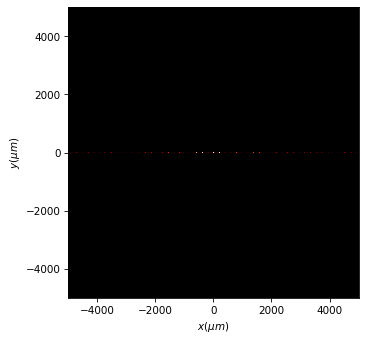

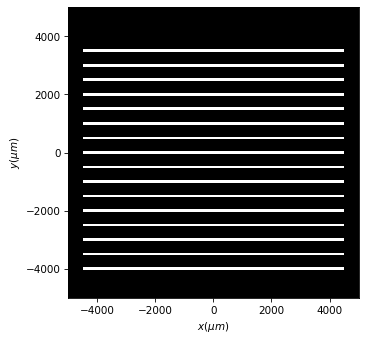

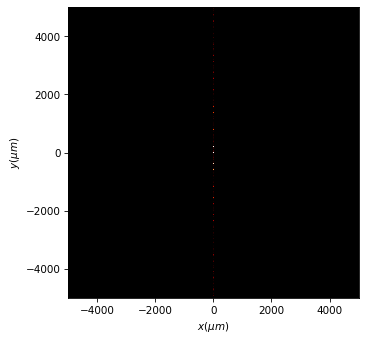

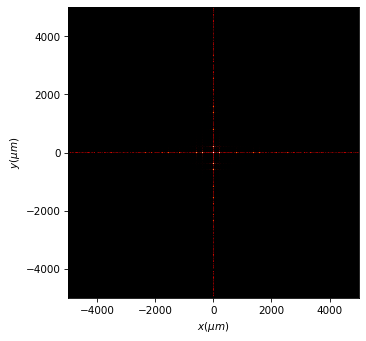

In [32]:
s0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
s1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
for i in range(-4000,4000,500):
        s1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
        s1.square(r0=(i, 0), size=(100 * um, 9000* um), angle=0)
        s0 = s0 + s1
s0.draw()
s1_ = s0 * u0
s1_ = s1_.fft(remove0=False, new_field=True)
s1_.draw(logarithm=1e-6)

s00 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
s2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
for i in range(-4000,4000,500):
        s2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
        s2.square(r0=(0, i), size=(100 * um, 9000* um), angle=90*degrees)
        s00 = s00 + s2
s00.draw()
s2_ = s00 * u0
s2_ = s2_.fft(remove0=False, new_field=True)
s2_.draw(logarithm=1e-6)

s_add = s1_ + s2_
s_add.draw(logarithm=1e-4)

s = s0 + s00


(<Figure size 480x360 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1b22b674970>)

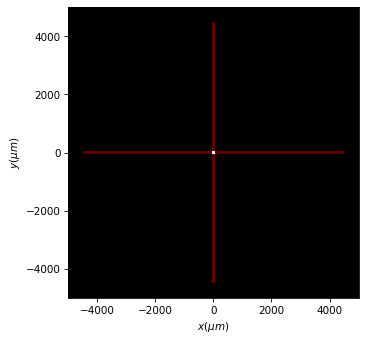

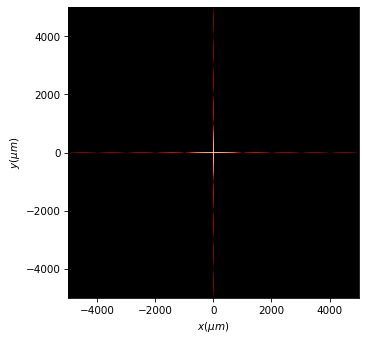

In [33]:
slit = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

slit1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
slit1.square(r0=(0, 0), size=(100 * um, 9000* um), angle=0)
slit = slit + slit1

slit2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
slit2.square(r0=(0, 0), size=(100 * um, 9000* um), angle=90*degrees)
slit = slit + slit2

slit.draw()
f = slit * u0
f_ = f.fft(remove0=False, new_field=True)
f_.draw(logarithm=1e-4)